# HISTORY

#### Context
* The diagnosis of blood-based diseases often involves identifying and characterizing patient blood samples. Automated methods to detect and classify blood cell subtypes have important medical applications.

#### Content
* This dataset contains 12,500 augmented images of blood cells (JPEG) with accompanying cell type labels (CSV). There are approximately 3,000 images for each of 4 different cell types grouped into 4 different folders (according to cell type). The cell types are Eosinophil, Lymphocyte, Monocyte, and Neutrophil. This dataset is accompanied by an additional dataset containing the original 410 images (pre-augmentation) as well as two additional subtype labels (WBC vs WBC) and also bounding boxes for each cell in each of these 410 images (JPEG + XML metadata). More specifically, the folder 'dataset-master' contains 410 images of blood cells with subtype labels and bounding boxes (JPEG + XML), while the folder 'dataset2-master' contains 2,500 augmented images as well as 4 additional subtype labels (JPEG + CSV). There are approximately 3,000 augmented images for each class of the 4 classes as compared to 88, 33, 21, and 207 images of each in folder 'dataset-master'.

# PACKAGES AND LIBRARIES

#### GENERAL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### PATH PROCESS

In [2]:
import os
import os.path
from pathlib import Path
import glob

#### IMAGE PROCESS

In [3]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### SCALER & TRANSFORMATION

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

#### ACCURACY CONTROL

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

#### OPTIMIZER

In [6]:
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer

#### MODEL LAYERS

In [205]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K

#### IGNORING WARNINGS

In [8]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH & LABELS

In [9]:
Train_Data_Path = Path("../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN")

In [10]:
Test_Data_Path = Path("../input/blood-cells/dataset2-master/dataset2-master/images/TEST")

In [11]:
Validation_Data_Path = Path("../input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE")

#### JPG PATH

In [12]:
Train_JPG_Path = list(Train_Data_Path.glob(r"**/*.jpeg"))

In [13]:
Test_JPG_Path = list(Test_Data_Path.glob(r"**/*.jpeg"))

In [14]:
Validation_JPG_Path = list(Validation_Data_Path.glob(r"**/*.jpeg"))

#### JPG LABELS

In [15]:
Train_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_JPG_Path))

In [16]:
print("EOSINOPHIL: ", Train_JPG_Labels.count("EOSINOPHIL"))
print("LYMPHOCYTE: ", Train_JPG_Labels.count("LYMPHOCYTE"))
print("MONOCYTE: ", Train_JPG_Labels.count("MONOCYTE"))
print("NEUTROPHIL: ", Train_JPG_Labels.count("NEUTROPHIL"))

EOSINOPHIL:  2497
LYMPHOCYTE:  2483
MONOCYTE:  2478
NEUTROPHIL:  2499


In [17]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [18]:
print("EOSINOPHIL: ", Test_JPG_Labels.count("EOSINOPHIL"))
print("LYMPHOCYTE: ", Test_JPG_Labels.count("LYMPHOCYTE"))
print("MONOCYTE: ", Test_JPG_Labels.count("MONOCYTE"))
print("NEUTROPHIL: ", Test_JPG_Labels.count("NEUTROPHIL"))

EOSINOPHIL:  623
LYMPHOCYTE:  620
MONOCYTE:  620
NEUTROPHIL:  624


In [19]:
Validation_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Validation_JPG_Path))

In [20]:
print("EOSINOPHIL: ", Validation_JPG_Labels.count("EOSINOPHIL"))
print("LYMPHOCYTE: ", Validation_JPG_Labels.count("LYMPHOCYTE"))
print("MONOCYTE: ", Validation_JPG_Labels.count("MONOCYTE"))
print("NEUTROPHIL: ", Validation_JPG_Labels.count("NEUTROPHIL"))

EOSINOPHIL:  13
LYMPHOCYTE:  6
MONOCYTE:  4
NEUTROPHIL:  48


# TRANSFORMATION TO SERIES STRUCTURE

#### TRAIN

In [21]:
Train_JPG_Path_Series = pd.Series(Train_JPG_Path,name="JPG").astype(str)

In [22]:
Train_JPG_Labels_Series = pd.Series(Train_JPG_Labels,name="CATEGORY")

#### TEST

In [23]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)

In [24]:
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="CATEGORY")

#### VALIDATION

In [25]:
Validation_JPG_Path_Series = pd.Series(Validation_JPG_Path,name="JPG").astype(str)

In [26]:
Validation_JPG_Labels_Series = pd.Series(Validation_JPG_Labels,name="CATEGORY")

# TRANSFORMATION TO DATAFRAME STRUCTURE

In [27]:
Main_Train_Data = pd.concat([Train_JPG_Path_Series,Train_JPG_Labels_Series],axis=1)

In [28]:
print(Main_Train_Data.head(-1))

                                                    JPG    CATEGORY
0     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
1     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
2     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
3     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
4     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
...                                                 ...         ...
9951  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
9952  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
9953  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
9954  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
9955  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL

[9956 rows x 2 columns]


In [29]:
Main_Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [30]:
print(Main_Test_Data.head(-1))

                                                    JPG    CATEGORY
0     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
1     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
2     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
3     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
4     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
...                                                 ...         ...
2481  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
2482  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
2483  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
2484  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
2485  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL

[2486 rows x 2 columns]


In [31]:
Main_Validation_Data = pd.concat([Validation_JPG_Path_Series,Validation_JPG_Labels_Series],axis=1)

In [32]:
print(Main_Validation_Data.head(-1))

                                                  JPG    CATEGORY
0   ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
1   ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
2   ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
3   ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
4   ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
..                                                ...         ...
65  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
66  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
67  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
68  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
69  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL

[70 rows x 2 columns]


# SHUFFLING

In [33]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [34]:
print(Main_Train_Data.head(-1))

                                                    JPG    CATEGORY
0     ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
1     ../input/blood-cells/dataset2-master/dataset2-...  LYMPHOCYTE
2     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
3     ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
4     ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
...                                                 ...         ...
9951  ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
9952  ../input/blood-cells/dataset2-master/dataset2-...  LYMPHOCYTE
9953  ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
9954  ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
9955  ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL

[9956 rows x 2 columns]


In [35]:
print(Main_Train_Data["JPG"][1])
print(Main_Train_Data["CATEGORY"][1])
print(Main_Train_Data["JPG"][1398])
print(Main_Train_Data["CATEGORY"][1398])
print(Main_Train_Data["JPG"][355])
print(Main_Train_Data["CATEGORY"][355])
print(Main_Train_Data["JPG"][710])
print(Main_Train_Data["CATEGORY"][710])

../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_19_4630.jpeg
LYMPHOCYTE
../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_72_1088.jpeg
EOSINOPHIL
../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_6_2961.jpeg
MONOCYTE
../input/blood-cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_4_5383.jpeg
EOSINOPHIL


In [36]:
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)

In [37]:
print(Main_Test_Data.head(-1))

                                                    JPG    CATEGORY
0     ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
1     ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
2     ../input/blood-cells/dataset2-master/dataset2-...  LYMPHOCYTE
3     ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
4     ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
...                                                 ...         ...
2481  ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
2482  ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE
2483  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
2484  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
2485  ../input/blood-cells/dataset2-master/dataset2-...    MONOCYTE

[2486 rows x 2 columns]


In [38]:
print(Main_Test_Data["JPG"][1])
print(Main_Test_Data["CATEGORY"][1])
print(Main_Test_Data["JPG"][1398])
print(Main_Test_Data["CATEGORY"][1398])
print(Main_Test_Data["JPG"][355])
print(Main_Test_Data["CATEGORY"][355])
print(Main_Test_Data["JPG"][710])
print(Main_Test_Data["CATEGORY"][710])

../input/blood-cells/dataset2-master/dataset2-master/images/TEST/NEUTROPHIL/_44_4777.jpeg
NEUTROPHIL
../input/blood-cells/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/_1_8803.jpeg
EOSINOPHIL
../input/blood-cells/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL/_8_8461.jpeg
EOSINOPHIL
../input/blood-cells/dataset2-master/dataset2-master/images/TEST/MONOCYTE/_3_2696.jpeg
MONOCYTE


In [39]:
Main_Validation_Data = Main_Validation_Data.sample(frac=1).reset_index(drop=True)

In [40]:
print(Main_Validation_Data.head(-1))

                                                  JPG    CATEGORY
0   ../input/blood-cells/dataset2-master/dataset2-...  LYMPHOCYTE
1   ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
2   ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
3   ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
4   ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
..                                                ...         ...
65  ../input/blood-cells/dataset2-master/dataset2-...  EOSINOPHIL
66  ../input/blood-cells/dataset2-master/dataset2-...  LYMPHOCYTE
67  ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
68  ../input/blood-cells/dataset2-master/dataset2-...  NEUTROPHIL
69  ../input/blood-cells/dataset2-master/dataset2-...  LYMPHOCYTE

[70 rows x 2 columns]


In [41]:
print(Main_Validation_Data["JPG"][1])
print(Main_Validation_Data["CATEGORY"][1])
print(Main_Validation_Data["JPG"][52])
print(Main_Validation_Data["CATEGORY"][52])
print(Main_Validation_Data["JPG"][11])
print(Main_Validation_Data["CATEGORY"][11])
print(Main_Validation_Data["JPG"][25])
print(Main_Validation_Data["CATEGORY"][25])

../input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/_0_1966.jpeg
NEUTROPHIL
../input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/_34_3330.jpeg
NEUTROPHIL
../input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/_5_1744.jpeg
EOSINOPHIL
../input/blood-cells/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/_2_1226.jpeg
EOSINOPHIL


# VISUALIZATION

In [42]:
plt.style.use('dark_background')

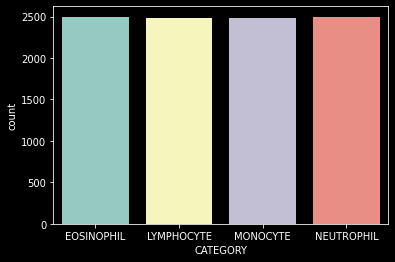

In [43]:
sns.countplot(Main_Train_Data["CATEGORY"])
plt.show()

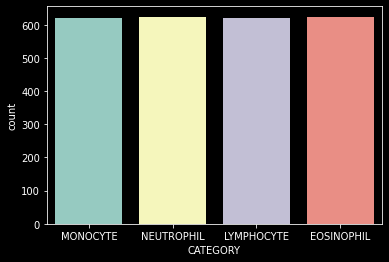

In [44]:
sns.countplot(Main_Test_Data["CATEGORY"])
plt.show()

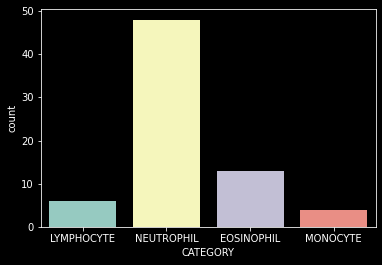

In [45]:
sns.countplot(Main_Validation_Data["CATEGORY"])
plt.show()

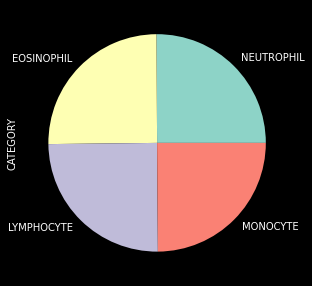

In [46]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

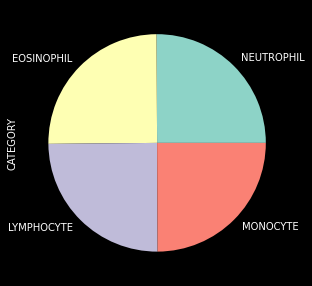

In [47]:
Main_Test_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

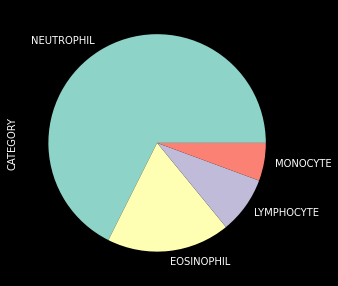

In [48]:
Main_Validation_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

Text(0.5, 1.0, 'EOSINOPHIL')

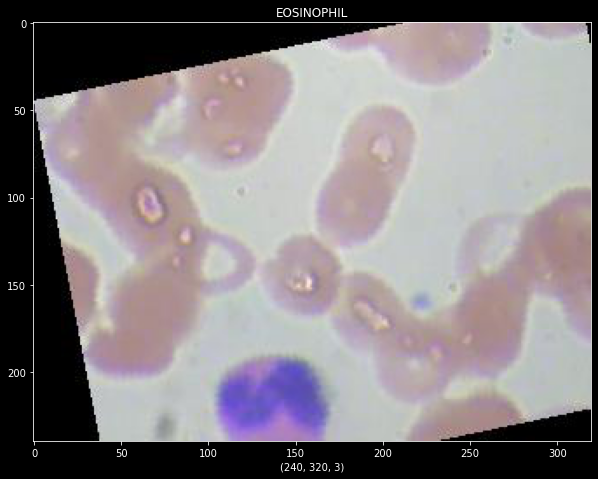

In [49]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Train_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][0])

Text(0.5, 1.0, 'MONOCYTE')

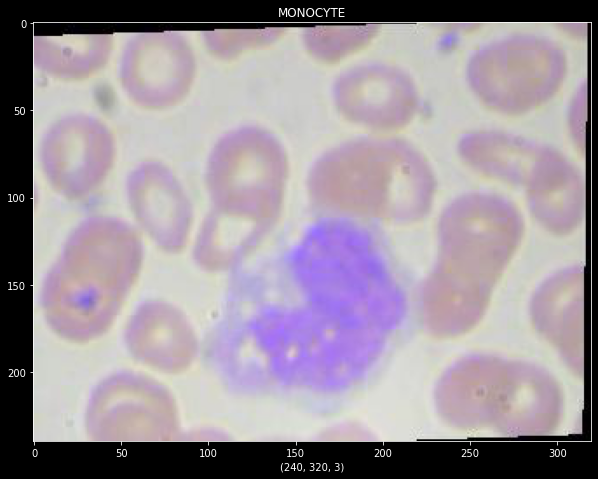

In [50]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Test_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Test_Data["CATEGORY"][0])

Text(0.5, 1.0, 'NEUTROPHIL')

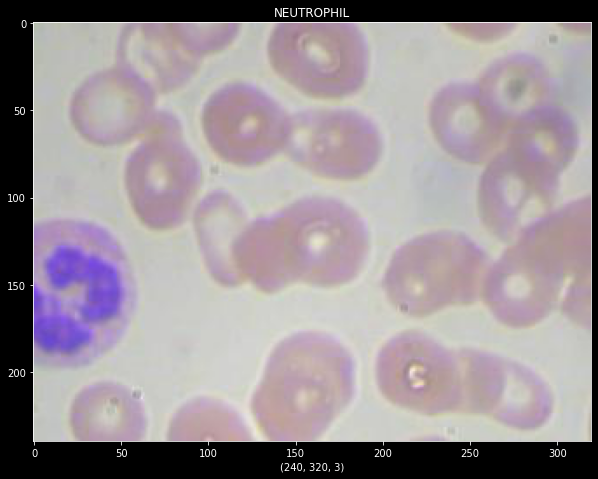

In [51]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Validation_Data["JPG"][52])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Validation_Data["CATEGORY"][52])

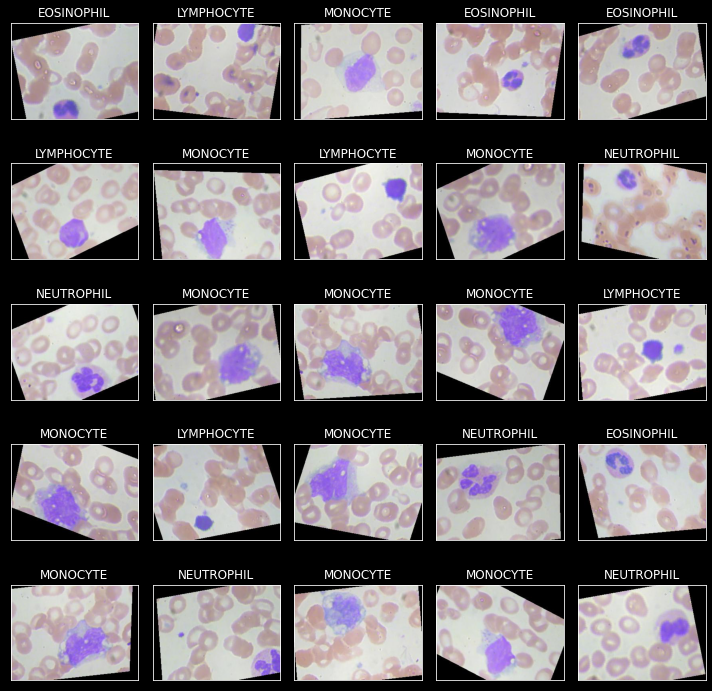

In [52]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

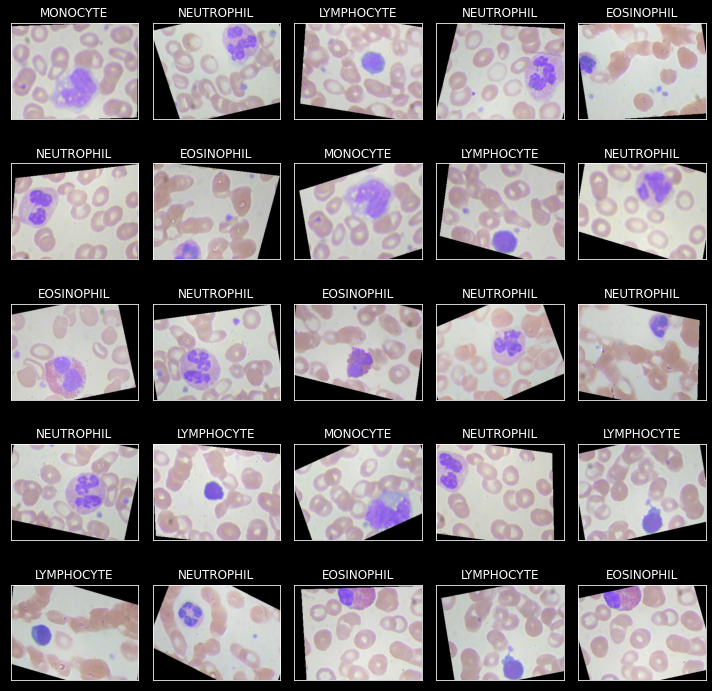

In [53]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Test_Data["JPG"][i]))
    ax.set_title(Main_Test_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

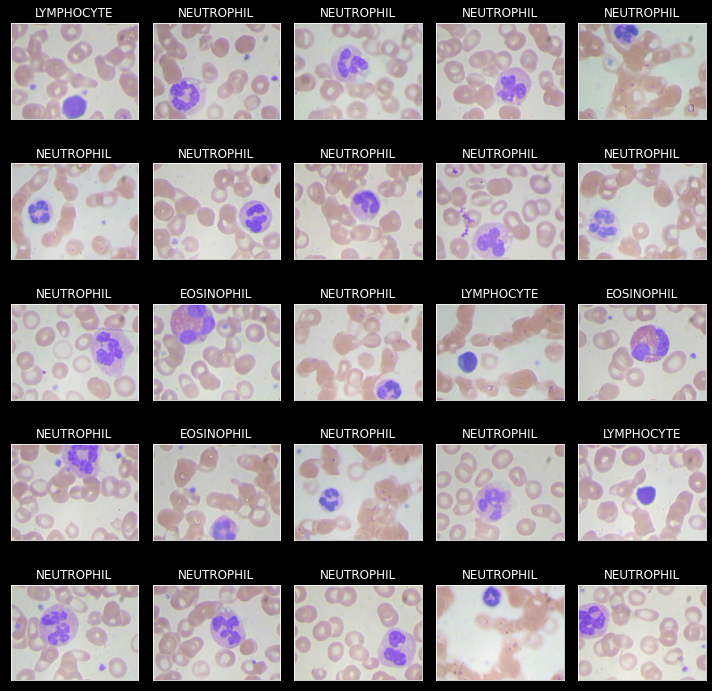

In [54]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Validation_Data["JPG"][i]))
    ax.set_title(Main_Validation_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# DETERMINATION TRAIN AND TEST DATA

#### IMAGE GENERATOR

In [55]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.3,
                                    shear_range=0.3,
                                    rotation_range=40,
                                    horizontal_flip=True,
                                    fill_mode="nearest")

In [56]:
Test_Validation_Generator = ImageDataGenerator(rescale=1./255,validation_split=0.5)

#### How Generator Applied Image Look Like

In [57]:
exp_IMG = Main_Train_Data["JPG"][22]
Load_IMG = image.load_img(exp_IMG,target_size=(220,220))
Array_IMG = image.img_to_array(Load_IMG)
Array_IMG = Array_IMG.reshape((1,) + Array_IMG.shape)

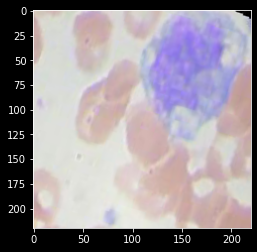

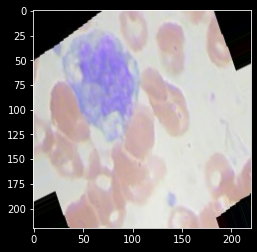

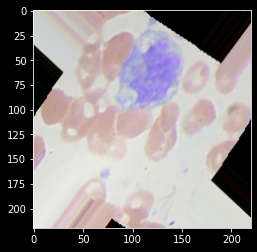

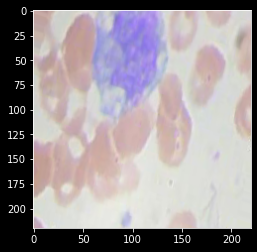

In [58]:
i = 0
for batch in Train_Generator.flow(Array_IMG,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [150]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Train_Data,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   subset="training",
                                                   seed=42,
                                                   batch_size=32,
                                                   target_size=(220,220))

Found 9957 validated image filenames belonging to 4 classes.


In [151]:
Test_IMG_Set = Test_Validation_Generator.flow_from_dataframe(dataframe=Main_Test_Data,
                                                            x_col="JPG",
                                                            y_col="CATEGORY",
                                                            color_mode="rgb",
                                                            class_mode="categorical",
                                                            seed=42,
                                                            batch_size=32,
                                                            target_size=(220,220))

Found 2487 validated image filenames belonging to 4 classes.


In [152]:
Validation_IMG_Set = Test_Validation_Generator.flow_from_dataframe(dataframe=Main_Validation_Data,
                                                                  x_col="JPG",
                                                                  y_col="CATEGORY",
                                                                  color_mode="rgb",
                                                                  class_mode="categorical",
                                                                  seed=42,
                                                                  batch_Size=32,
                                                                  target_size=(220,200),
                                                                  subset="validation")

Found 35 validated image filenames belonging to 4 classes.


#### IMG SET CHECKING

In [78]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 220, 220, 3)
LABEL SHAPE:  (32, 4)


In [79]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 220, 200, 3)
LABEL SHAPE:  (32, 4)


In [80]:
for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 220, 220, 3)
LABEL SHAPE:  (32, 4)


In [81]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
[0, 1, 2, 0, 0]
(220, 220, 3)
------------------------------------------------------------
VALIDATION: 
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
[1, 3, 3, 3, 3]
(220, 200, 3)
------------------------------------------------------------
TEST: 
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}
[2, 3, 1, 3, 0]
(220, 220, 3)


# CNN STRUCTURE WITH SeparableConv2D

In [90]:
Model = Sequential()

Model.add(SeparableConv2D(32,3,
                          activation="relu",
                 input_shape=(220,220,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2)))

#
Model.add(SeparableConv2D(64,3,
                 activation="relu"))
Model.add(SeparableConv2D(128,(3,3),
                 activation="relu"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2)))

#
Model.add(SeparableConv2D(64,3,
                 activation="relu"))
Model.add(SeparableConv2D(128,3,
                 activation="relu"))
Model.add(Dropout(0.5))
Model.add(GlobalAveragePooling2D())

#
Model.add(Flatten())
Model.add(Dense(256,
                activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(4,
                activation="softmax"))

In [91]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,mode="max")

In [92]:
Model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [93]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                            callbacks=Call_Back,
                      epochs=50)

Epoch 1/50
312/312 [==============================] - 138s 438ms/step - loss: 1.3611 - accuracy: 0.2794 - val_loss: 1.3914 - val_accuracy: 0.0857
Epoch 2/50
312/312 [==============================] - 136s 436ms/step - loss: 1.1957 - accuracy: 0.4394 - val_loss: 1.2860 - val_accuracy: 0.2286
Epoch 3/50
312/312 [==============================] - 136s 437ms/step - loss: 1.1075 - accuracy: 0.4941 - val_loss: 1.1023 - val_accuracy: 0.3143
Epoch 4/50
312/312 [==============================] - 136s 437ms/step - loss: 0.9904 - accuracy: 0.5512 - val_loss: 0.6292 - val_accuracy: 0.8571
Epoch 5/50
312/312 [==============================] - 136s 436ms/step - loss: 0.7376 - accuracy: 0.7053 - val_loss: 0.6289 - val_accuracy: 0.7429
Epoch 6/50
312/312 [==============================] - 136s 437ms/step - loss: 0.4110 - accuracy: 0.8426 - val_loss: 0.2303 - val_accuracy: 0.9429
Epoch 7/50
312/312 [==============================] - 136s 436ms/step - loss: 0.3377 - accuracy: 0.8679 - val_loss: 0.2519 -

In [94]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

78/78 [==============================] - 17s 219ms/step - loss: 0.2998 - accuracy: 0.8488
LOSS:  0.2998
ACCURACY:  0.85


In [95]:
print(Model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_11 (Separab (None, 218, 218, 32)      155       
_________________________________________________________________
batch_normalization_7 (Batch (None, 218, 218, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
separable_conv2d_12 (Separab (None, 107, 107, 64)      2400      
_________________________________________________________________
separable_conv2d_13 (Separab (None, 105, 105, 128)     8896      
_________________________________________________________________
dropout_9 (Dropout)          (None, 105, 105, 128)     0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 52, 52, 128)      

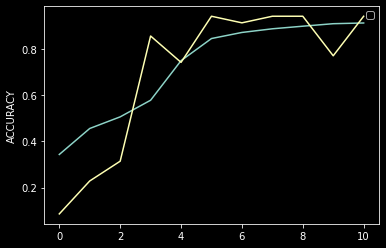

In [96]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

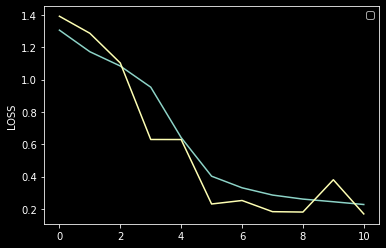

In [97]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

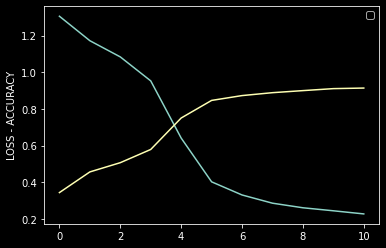

In [98]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["accuracy"])
plt.ylabel("LOSS - ACCURACY")
plt.legend()
plt.show()

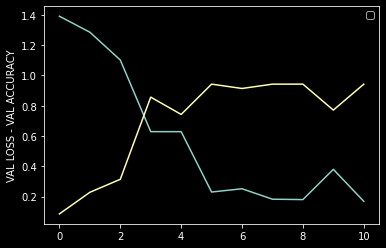

In [99]:
plt.plot(CNN_Model.history["val_loss"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("VAL LOSS - VAL ACCURACY")
plt.legend()
plt.show()

<AxesSubplot:>

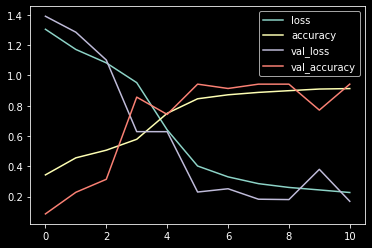

In [100]:
Dict_Summary = pd.DataFrame(CNN_Model.history)
Dict_Summary.plot()

# LEARNING IN EACH LAYER

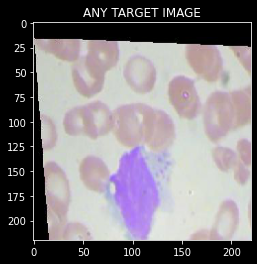

In [105]:
Any_IMG = Main_Train_Data["JPG"][6]
IMG = image.load_img(Any_IMG,target_size=(220,220))
Array_IMG = image.img_to_array(IMG)
Array_IMG = np.expand_dims(Array_IMG,axis=0)
Array_IMG /= 255

plt.imshow(Array_IMG[0])
plt.title("ANY TARGET IMAGE")
plt.show()

In [106]:
layer_out = [layer.output for layer in Model.layers[:8]]
activation_model = models.Model(inputs=Model.input,outputs=layer_out)
activations = activation_model.predict(Array_IMG)

first_layer_act = activations[0]
print(first_layer_act.shape)

(1, 218, 218, 32)


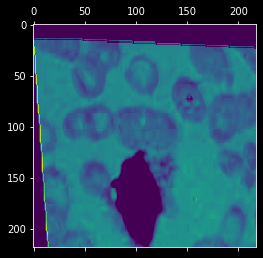

In [107]:
plt.matshow(first_layer_act[0,:,:,4],cmap="viridis")

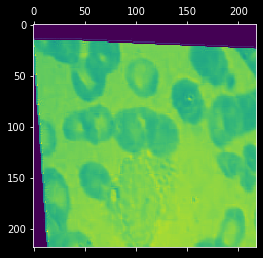

In [108]:
plt.matshow(first_layer_act[0,:,:,7],cmap="viridis")

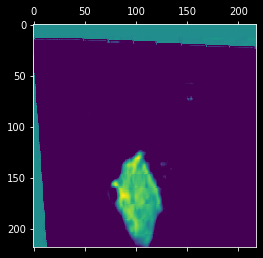

In [116]:
plt.matshow(first_layer_act[0,:,:,15],cmap="viridis")

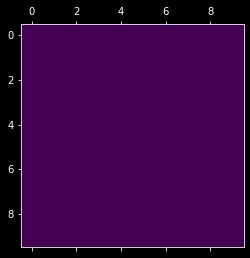

In [109]:
plt.matshow(first_layer_act[0,:10,:10,7],cmap="viridis")

# PREDICTION

In [117]:
Prediction = Model.predict(Test_IMG_Set)
Prediction = Prediction.argmax(axis=-1)

In [118]:
print(Prediction)

[2 2 1 ... 2 3 1]


* 'EOSINOPHIL': 0
* 'LYMPHOCYTE': 1
* 'MONOCYTE': 2
* 'NEUTROPHIL': 3

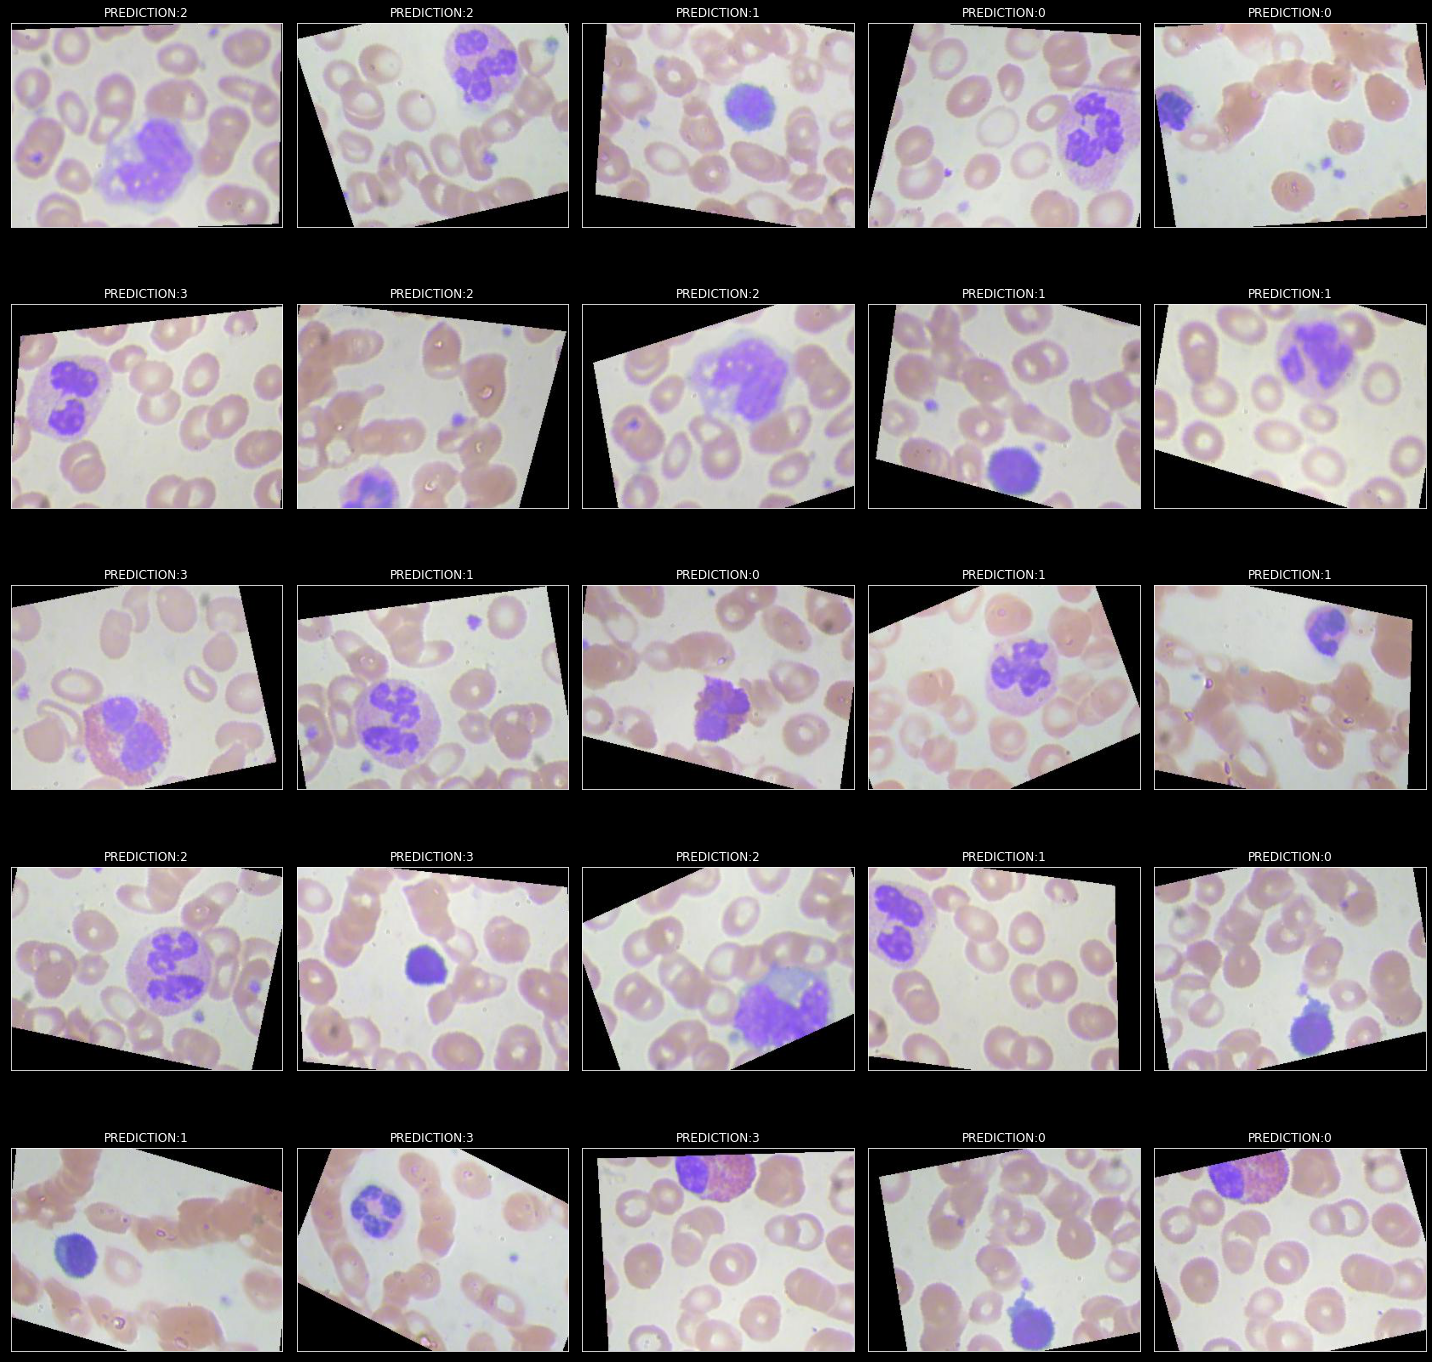

In [119]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Test_Data["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Prediction[i]}")
plt.tight_layout()
plt.show()